In [1]:
import cv2 as cv
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import helpers as hp
import csv
from pathlib import Path

%load_ext autoreload
%autoreload 2

# Image pre-processing

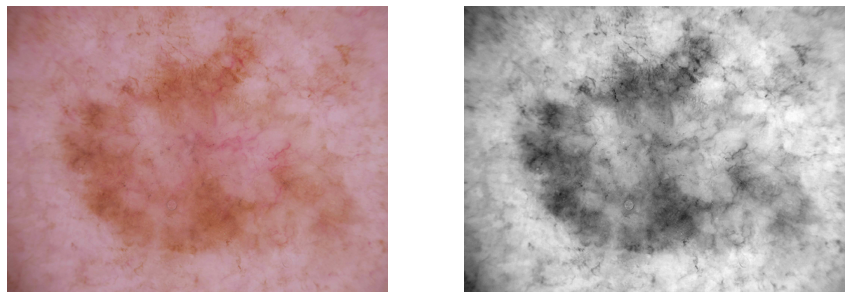

In [15]:
# it needs to convert the color code to display properly using matplotlib
# OpenCV uses BGR whereas matplotlib uses RGB
rgb_img = cv.cvtColor(cv.imread('./ham10k_images/ISIC_0029318.jpg'), cv.COLOR_BGR2RGB)
bw_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2GRAY)

if rgb_img is None:
    print('Could not read RGB the image.')

if bw_img is None:
    print('Could not read B&W the image.')

fig, axes = plt.subplots(1, 2, figsize=(15,15))

for img, axe in zip([rgb_img, bw_img], [0, 1]):
    axes[axe].axis('off')
    axes[axe].imshow(img, cmap='gray')

In [16]:
test = cv.resize(rgb_img, (256, 256))

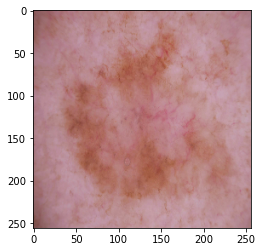

In [17]:
plt.imshow(test)

## B&W 

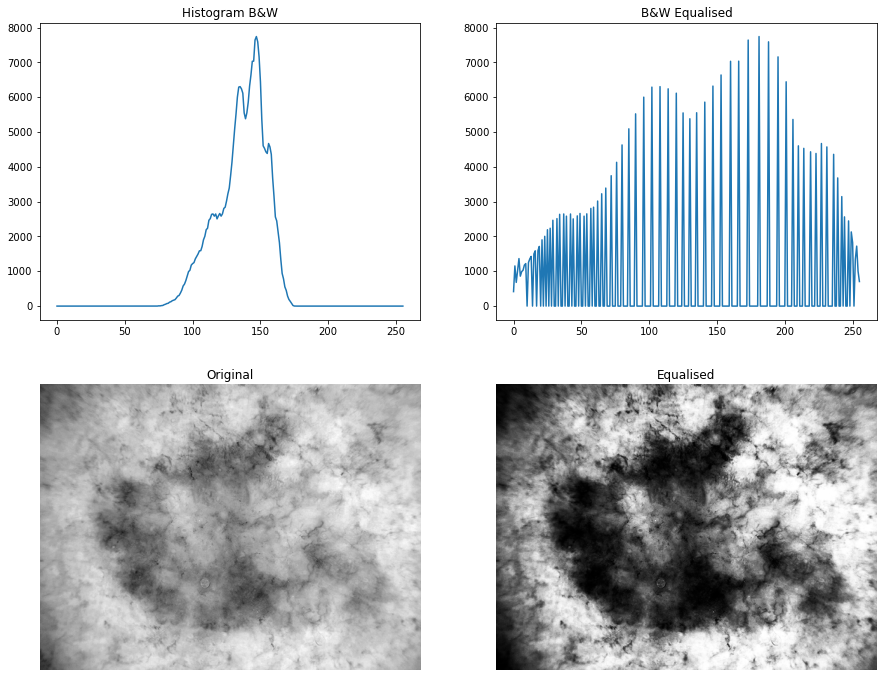

In [5]:
hp.compare_hist(bw_img)

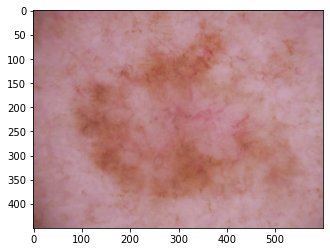

In [26]:
blurred = cv.GaussianBlur(rgb_img, (3,3), 0)

plt.imshow(blurred, cmap='gray')

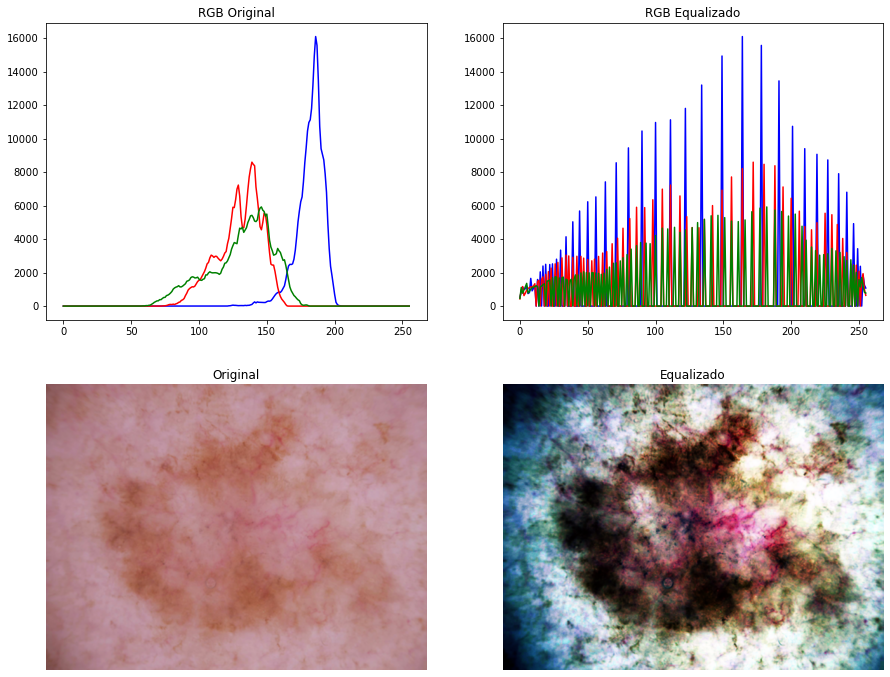

In [27]:
hp.compare_hist(blurred, bw=False)

## RGB

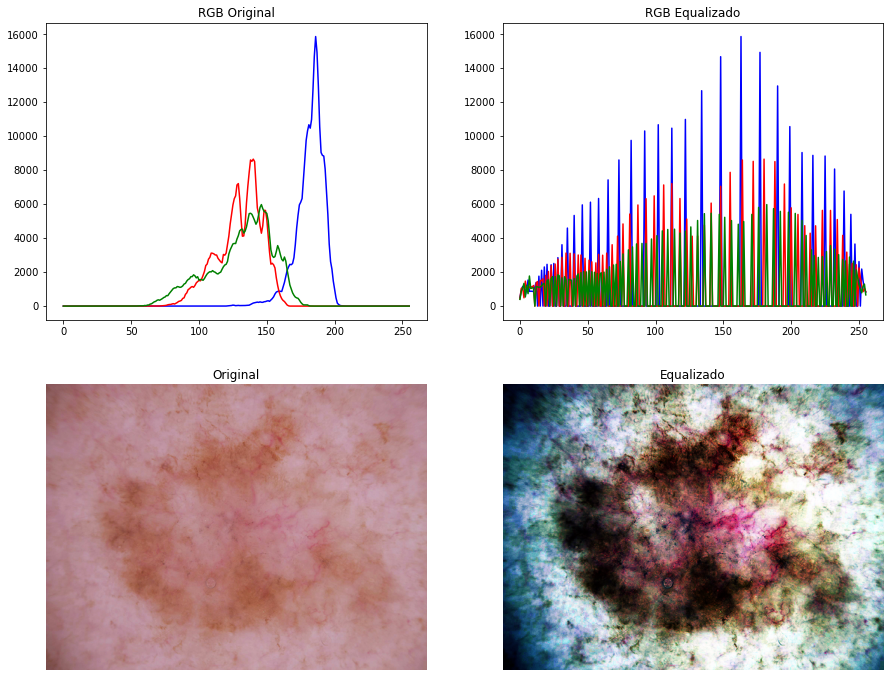

In [3]:
hp.compare_hist(rgb_img, bw=False)

# Metadata

In [26]:
path_meta = './metadata/HAM10000_metadata.csv'
ham10k_df = hp.create_metadata_df(path_meta)

In [27]:
ham10k_df.head(3)

,lesion_id,dx,dx_type,age,sex,localization,lesion_type
image_id,,,,,,,
ISIC_0024306,HAM_0000550,nv,follow_up,45.0,male,trunk,melanocytic nevi
ISIC_0024307,HAM_0003577,nv,follow_up,50.0,male,lower extremity,melanocytic nevi
ISIC_0024308,HAM_0001477,nv,follow_up,55.0,female,trunk,melanocytic nevi


In [28]:
ham10k_df.isna().sum()

lesion_id        0
dx               0
dx_type          0
age             57
sex              0
localization     0
lesion_type      0
dtype: int64

In [29]:
ham10k_df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [30]:
ham10k_df.dx.value_counts(normalize=True)

nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: dx, dtype: float64

In [31]:
ham10k_df.sample(frac=0.8).dx.value_counts(normalize=True)

nv       0.671742
mel      0.109461
bkl      0.108337
bcc      0.051922
akiec    0.032077
vasc     0.014853
df       0.011608
Name: dx, dtype: float64

In [32]:
def preprocessing_img(img):
        img = cv.GaussianBlur(img, (3,3), 0)
        img = hp.equalize_rgb_channels(img)
        return img

In [35]:
ham10k_df[ham10k_df.dx == 'df']

,lesion_id,dx,dx_type,age,sex,localization,lesion_type
image_id,,,,,,,
ISIC_0024318,HAM_0002450,df,consensus,65.0,female,lower extremity,dermatofibroma
ISIC_0024330,HAM_0006188,df,consensus,40.0,male,lower extremity,dermatofibroma
ISIC_0024386,HAM_0005112,df,consensus,40.0,female,lower extremity,dermatofibroma
ISIC_0024396,HAM_0002450,df,consensus,65.0,female,lower extremity,dermatofibroma
ISIC_0024553,HAM_0005330,df,consensus,50.0,female,upper extremity,dermatofibroma
...,...,...,...,...,...,...,...
ISIC_0033847,HAM_0003081,df,consensus,45.0,male,abdomen,dermatofibroma
ISIC_0033860,HAM_0003081,df,consensus,45.0,male,abdomen,dermatofibroma
ISIC_0033891,HAM_0007396,df,consensus,35.0,female,lower extremity,dermatofibroma


In [25]:
img_dir = './ham10k_images'

for filename in Path(img_dir).glob('**/*.jpg'):
    print(filename.stem)
    print(filename.name)
    print(filename.parts)
    
    break

ISIC_0030858
ISIC_0030858.jpg
('ham10k_images', 'ISIC_0030858.jpg')


In [9]:
downsample_test = ham10k_df[ham10k_df.dx == 'nv'].sample(frac=0.85).index

In [10]:
ham_down = ham10k_df.drop(index=downsample_test)

In [11]:
ham_down.dx.value_counts(normalize=True)

mel      0.257878
bkl      0.254634
nv       0.233086
bcc      0.119092
akiec    0.075765
vasc     0.032901
df       0.026645
Name: dx, dtype: float64

In [5]:
ham10k_df_pt = hp.translate_dataset(ham10k_df)

In [6]:
ham10k_df_pt.head()

,lesion_id,dx,dx_type,age,sex,localization,lesion_type
image_id,,,,,,,
ISIC_0024306,HAM_0000550,nv,follow_up,45.0,homem,tronco,nevo melanocítico
ISIC_0024307,HAM_0003577,nv,follow_up,50.0,homem,extr. inferior,nevo melanocítico
ISIC_0024308,HAM_0001477,nv,follow_up,55.0,mulher,tronco,nevo melanocítico
ISIC_0024309,HAM_0000484,nv,follow_up,40.0,homem,tronco,nevo melanocítico
ISIC_0024310,HAM_0003350,mel,histo,60.0,homem,peito,melanoma


### Exploratory Data Analysis

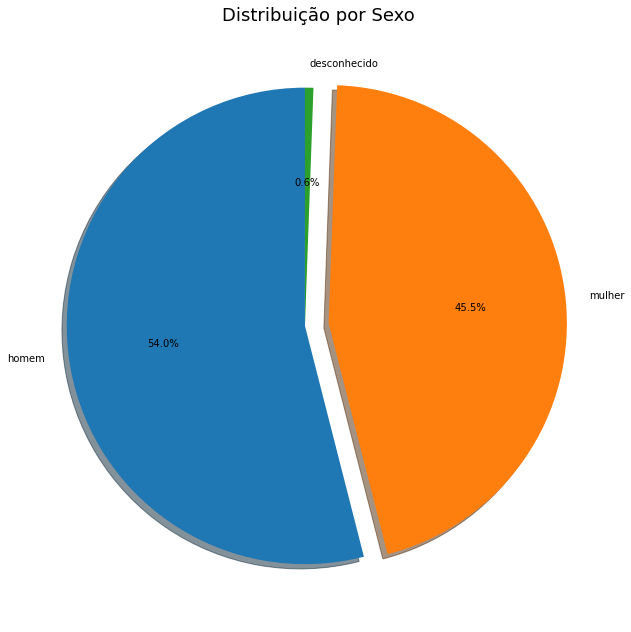

In [12]:
fig1, ax1 = plt.subplots(figsize=(10,11))
ax1.pie(ham10k_df_pt.sex.value_counts().values, 
        explode=(0, 0.1, 0), 
        labels=ham10k_df_pt.sex.value_counts().index, 
        autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.rc('font', size=15)
plt.rc('axes', labelsize=20)
plt.title('Distribuição por Sexo');

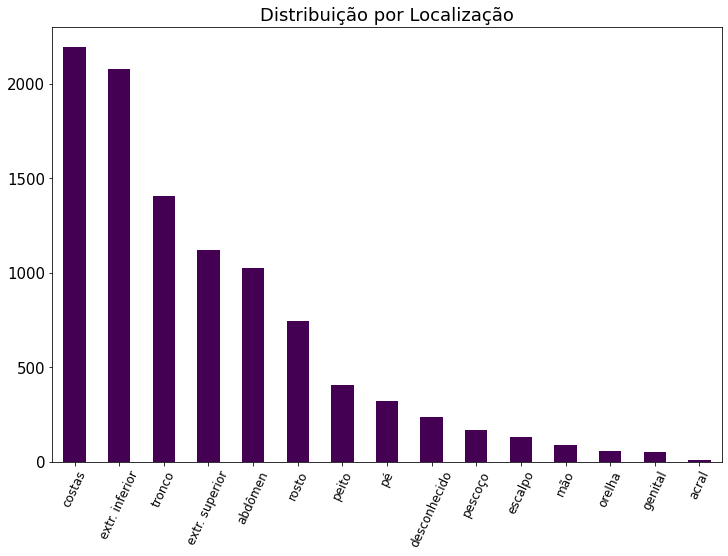

In [13]:
ham10k_df_pt.localization.value_counts().plot(kind='bar', 
                                              figsize=(12,8), 
                                              cmap='viridis', 
                                              title='Distribuição por Localização')

plt.xticks(rotation = 65, fontsize=12);

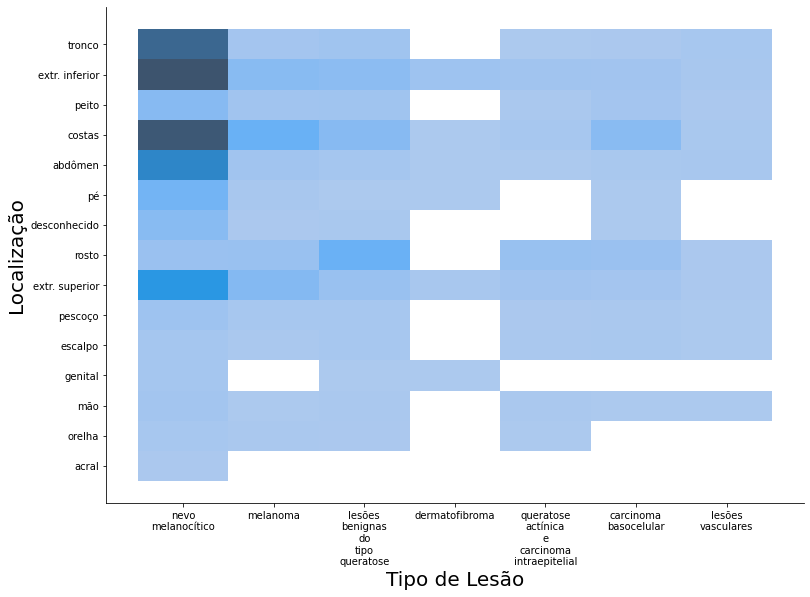

In [16]:
import textwrap as tw


ax = sns.displot(ham10k_df_pt, x="lesion_type", y="localization", height=8, aspect=1.5)

xticks = [y for x in list(plt.xticks())[1:] for y in x]

texts = ['\n'.join(t.get_text().split(' '))  for t in xticks]
#print(texts)

plt.xlabel('Tipo de Lesão')
plt.ylabel('Localização')
ax.set_xticklabels(texts)
plt.xticks(fontsize=10, rotation=0);
plt.yticks(fontsize=10, rotation=0);

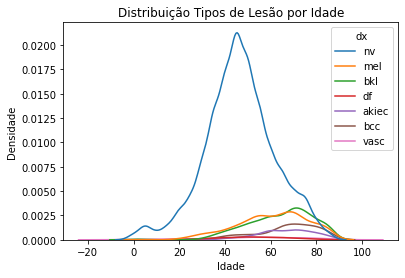

In [121]:
sns.kdeplot(x=ham_df.age, hue=ham_df.dx).set(title='Distribuição Tipos de Lesão por Idade',
                                            xlabel='Idade',
                                            ylabel='Densidade');

In [ ]:
import fnmatch

In [17]:
dirname = os.path.relpath('./ham10k_images/')
print(dirname)

ham10k_images


In [19]:
filenames = os.listdir(dirname)

In [ ]:
list(map(lambda x: os.path.splitext(x)[0], sorted(filenames))) == ham10k_df.index.tolist()

In [ ]:
for dirname, _, filenames in os.walk(dirname):
    for filename in filenames:
        # get the img id by removing file extension
        img_id, _ = os.path.splitext(filename)
        if img_id in ham10k_df.index:
            print(img_id)
            break

In [21]:
img_dict = {}

for filename in filenames:
    # remove extension
    image_id, _ = os.path.splitext(filename)
    print(image_id)
    img = cv.cvtColor(cv.imread(dirname + '/' + filename), cv.COLOR_BGR2RGB)
    #plt.imshow(img)
    # ham10k_df.loc[image_id, 'pixel_repr'] = np.asarray(img)
    break

ISIC_0030858


In [22]:
img = cv.cvtColor(cv.imread(dirname + '/' + filename), cv.COLOR_BGR2RGB)

In [24]:
bw_eq = cv.equalizeHist(bw_img)

ret, thresh = cv.threshold(bw_eq,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [25]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

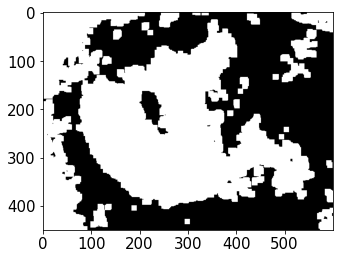

In [26]:
plt.imshow(sure_bg, cmap='gray')

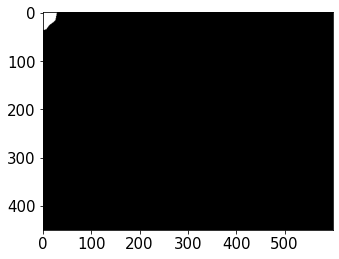

In [27]:
plt.imshow(sure_fg, cmap='gray')

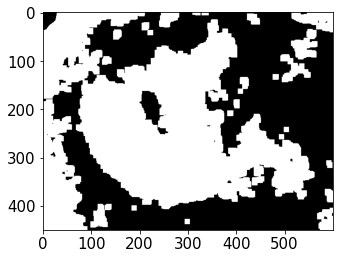

In [28]:
plt.imshow(unknown, cmap='gray')

In [29]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

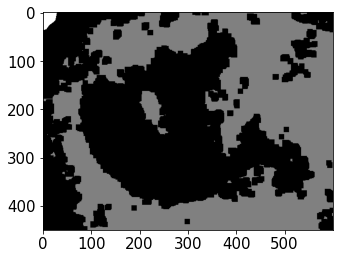

In [30]:
plt.imshow(markers, cmap='gray')

In [31]:
ret,thresh = cv.threshold(bw_eq,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 2.0, 'm10': 1128.0, 'm01': 894.0, 'm20': 636192.3333333333, 'm11': 504216.0, 'm02': 399618.3333333333, 'm30': 358812852.0, 'm21': 284377973.0, 'm12': 225384740.0, 'm03': 178629693.0, 'mu20': 0.3333333332557231, 'mu11': 0.0, 'mu02': 0.3333333333139308, 'mu30': 1.1920928955078125e-07, 'mu21': 3.4691765904426575e-08, 'mu12': 1.0943040251731873e-08, 'mu03': 2.9802322387695312e-08, 'nu20': 0.08333333331393078, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 2.1073424255447017e-08, 'nu21': 6.132695730589074e-09, 'nu12': 1.934474492199238e-09, 'nu03': 5.268356063861754e-09}


In [32]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

area = cv.contourArea(cnt)
perimeter = cv.arcLength(cnt,True)

epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

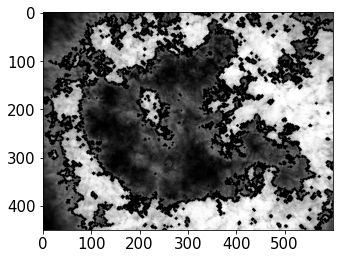

In [33]:
for contour in contours:
   cv.drawContours(bw_eq, contour, -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(bw_eq, cmap='gray')

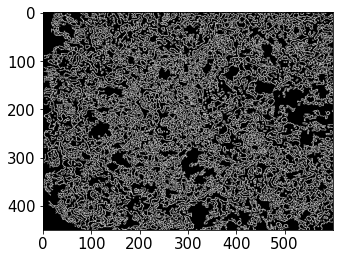

In [34]:
edged = cv.Canny(bw_eq, 0, 150)
plt.imshow(edged, cmap='gray')

# Test Mnist Dataframe

In [2]:
PATH_IMAGES = './ham10k_images'
PATH_METADATA = './metadata/HAM10000_metadata.csv'


def mnist_for_image(path_to_images, path_to_metadata):
    # read metadata and store image_id and lesion type (label)
    df_meta = pd.read_csv(path_to_metadata, 
                      index_col='image_id', 
                      usecols=['image_id', 'dx']).sort_index()
    
    index = df_meta.index
    labels = df_meta.dx
    del (df_meta)    
    # create dataset structure upon metadata 
    # get the features
    features = 227 * 227 * 3 # flatten out X
    # get the size of the largest number
    n_chars = len(str(features))
    # create columns (1 for each feature)
    columns = [f'pixel_{p:0>{n_chars}}' for p in range(features)]
    # insert columns to images metadata dataset
    df_test = pd.DataFrame(index=index, columns=columns)
    df_test['label'] = labels

    return df_test

In [3]:
df_mnist = mnist_for_image(PATH_IMAGES, PATH_METADATA)

In [4]:
df_mnist.head()

,pixel_000000,pixel_000001,pixel_000002,pixel_000003,pixel_000004,pixel_000005,pixel_000006,pixel_000007,pixel_000008,pixel_000009,...,pixel_154578,pixel_154579,pixel_154580,pixel_154581,pixel_154582,pixel_154583,pixel_154584,pixel_154585,pixel_154586,label
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0024306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nv
ISIC_0024307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nv
ISIC_0024308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nv
ISIC_0024309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nv
ISIC_0024310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mel


In [20]:
PATH_METADATA = './metadata/HAM10000_metadata.csv'
PATH_IMAGES = './ham10k_images'
# load metadata
df_meta = pd.read_csv(PATH_METADATA, 
                      index_col='image_id', 
                      usecols=['image_id', 'dx']).sort_index()

features = 227 * 227 * 3 # flatten out X
    # get the size of the largest number
n_chars = len(str(features))
# create columns (1 for each feature)
columns = [f'pixel_{p:0>{n_chars}}' for p in range(features)] + ['label']
# empty dataframe with columns
pd.DataFrame(columns=columns).to_csv("sample.csv", index=False)

In [6]:
features = 227 * 227 * 3 # flatten out X
    # get the size of the largest number
n_chars = len(str(features))
# create columns (1 for each feature)
columns = [f'pixel_{p:0>{n_chars}}' for p in range(features)] + ['label']
dtypes = {k: np.uint8 for k in columns if k != 'label'}

In [7]:
dtypes['label'] = str

In [15]:
dtypes['label']

str

In [ ]:

# read images
for filename in Path(PATH_IMAGES).glob('**/*.jpg'):
    # get the label for the image
    #label = df_meta.loc[filename.stem].dx 
    # read and resize the image
    print(filename.stem)
    image = cv.cvtColor(cv.imread(filename.as_posix()), cv.COLOR_BGR2GRAY)
    image = cv.resize(image, (227, 227))
    image = cv.equalizeHist(image)
    # flatten out for getting the features
    features = image.ravel().tolist()
    label = df_meta.loc[filename.stem].dx
    features.append(label)
    with open('sample.csv', 'a', newline='') as f_object:  
        # Pass the CSV  file object to the writer() function
        writer_object = csv.writer(f_object)
        # Result - a writer object
        # Pass the data in the list as an argument into the writerow() function
        writer_object.writerow(features)  
        # Close the file object
        f_object.close()
    # df_mnist.loc[filename.stem, df_mnist.columns[:-1]] = features

# Light Version Dataframe

In [149]:
# np.set_printoptions(threshold=sys.maxsize)



In [2]:
# dictionary {image_id: path_to_image}
path_dic = {filename.stem: filename.as_posix() for filename in Path('./ham10k_images').glob('**/*.jpg')}
# load dataset
df_meta = pd.read_csv('./metadata/HAM10000_metadata.csv', index_col='image_id').sort_index()
# map the image id to the image path
df_meta['path'] = df_meta.index.map(path_dic)

df_meta.head()

,lesion_id,dx,dx_type,age,sex,localization,path
image_id,,,,,,,
ISIC_0024306,HAM_0000550,nv,follow_up,45.0,male,trunk,ham10k_images/ISIC_0024306.jpg
ISIC_0024307,HAM_0003577,nv,follow_up,50.0,male,lower extremity,ham10k_images/ISIC_0024307.jpg
ISIC_0024308,HAM_0001477,nv,follow_up,55.0,female,trunk,ham10k_images/ISIC_0024308.jpg
ISIC_0024309,HAM_0000484,nv,follow_up,40.0,male,trunk,ham10k_images/ISIC_0024309.jpg
ISIC_0024310,HAM_0003350,mel,histo,60.0,male,chest,ham10k_images/ISIC_0024310.jpg


In [3]:
def preprocess_image(path, rgb=True, size=(227, 227)):
    if rgb:
        image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
        image = cv.resize(image, size)
        image = hp.equalize_rgb_channels(image)
    else:
        image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2GRAY)
        image = cv.resize(image, size)
        image = cv.equalizeHist(image)
    
    return image

df_meta['image'] = df_meta.path.apply(preprocess_image)

In [4]:
df_meta.head()

,lesion_id,dx,dx_type,age,sex,localization,path,image
image_id,,,,,,,,
ISIC_0024306,HAM_0000550,nv,follow_up,45.0,male,trunk,ham10k_images/ISIC_0024306.jpg,"[[[122, 115, 111], [150, 129, 132], [169, 109,..."
ISIC_0024307,HAM_0003577,nv,follow_up,50.0,male,lower extremity,ham10k_images/ISIC_0024307.jpg,"[[[90, 86, 102], [99, 81, 102], [109, 77, 126]..."
ISIC_0024308,HAM_0001477,nv,follow_up,55.0,female,trunk,ham10k_images/ISIC_0024308.jpg,"[[[241, 219, 230], [241, 233, 227], [227, 219,..."
ISIC_0024309,HAM_0000484,nv,follow_up,40.0,male,trunk,ham10k_images/ISIC_0024309.jpg,"[[[225, 166, 215], [185, 150, 188], [199, 150,..."
ISIC_0024310,HAM_0003350,mel,histo,60.0,male,chest,ham10k_images/ISIC_0024310.jpg,"[[[1, 2, 2], [1, 2, 3], [1, 1, 3], [0, 1, 2], ..."


In [16]:
img_tst = df_meta.loc['ISIC_0024315', 'image']

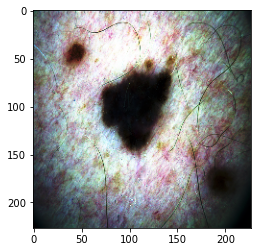

In [17]:
plt.imshow(img_tst, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


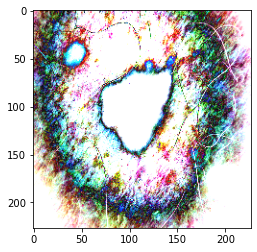

In [19]:
normalize_input = np.abs((img_tst - np.mean(img_tst)) / np.std(img_tst))
plt.imshow(normalize_input, cmap='gray')